In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")

y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

# Logistic Regression

In [4]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty = 'l2', random_state=1, multi_class="multinomial", max_iter=300, class_weight='balanced')

classifier.fit(X_train, y_train.values.ravel())

y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

y_pred_train_probs = classifier.predict_proba(X_train)
y_pred_test_probs = classifier.predict_proba(X_test)

from sklearn.metrics import roc_auc_score
print('ROC-AUC Random Forest train:', roc_auc_score(y_train, y_pred_train_probs, multi_class='ovr'))
print('ROC-AUC Random Forest test:', roc_auc_score(y_test, y_pred_test_probs, multi_class='ovr'))

ROC-AUC Random Forest train: 0.7978883898445163
ROC-AUC Random Forest test: 0.6124062338434794


C:\Users\neere\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


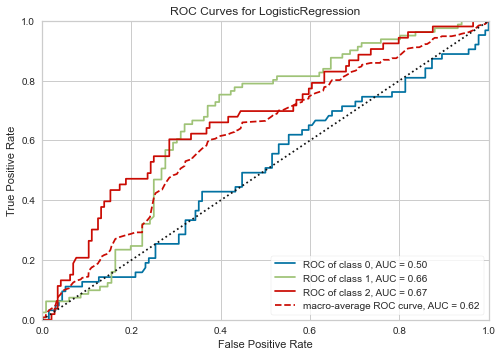

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [5]:
# Plotting ROC-AUC
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(
    classifier, per_class=True, cmap="cool", micro=False,
)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

### Scoring New Data

In [20]:
new_data = X_train[X_train.index == 28]
classifier.predict(new_data)

array([1], dtype=int64)

In [21]:
y_train[y_train.index == 28]

,knowledge_improvement
28,1


## Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

C:\Users\neere\AppData\Local\Temp\ipykernel_13440\3210368664.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


In [8]:
print("Train Matrix: ")
print('Confusion Matrix: \n', confusion_matrix(y_train, classifier.predict(X_train)))
print()

print("Test Matrix: ")
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print()

print("Train Accuracy: ", accuracy_score(y_train, classifier.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, classifier.predict(X_test)))

Train Matrix: 
Confusion Matrix: 
 [[ 99   2   1]
 [  1 116   0]
 [  1   0  74]]

Test Matrix: 
Confusion Matrix: 
 [[23 23 17]
 [27 44 10]
 [11 18 24]]

Train Accuracy:  0.9829931972789115
Test Accuracy:  0.4619289340101523


C:\Users\neere\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


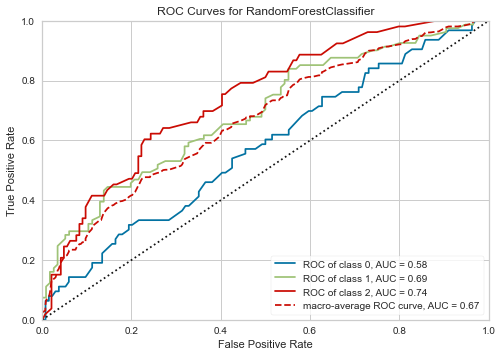

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [9]:
# Plotting ROC-AUC
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(
    classifier, per_class=True, cmap="cool", micro=False,
)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [10]:
# Applying XGBoost
from xgboost import XGBClassifier
classifier = XGBClassifier()

In [11]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [12]:
print("Train Matrix: ")
print('Confusion Matrix: \n', confusion_matrix(y_train, classifier.predict(X_train)))
print()

print("Test Matrix: ")
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print()

print("Train Accuracy: ", accuracy_score(y_train, classifier.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, classifier.predict(X_test)))

Train Matrix: 
Confusion Matrix: 
 [[ 99   2   1]
 [  1 116   0]
 [  1   0  74]]

Test Matrix: 
Confusion Matrix: 
 [[26 22 15]
 [28 42 11]
 [15 12 26]]

Train Accuracy:  0.9829931972789115
Test Accuracy:  0.47715736040609136


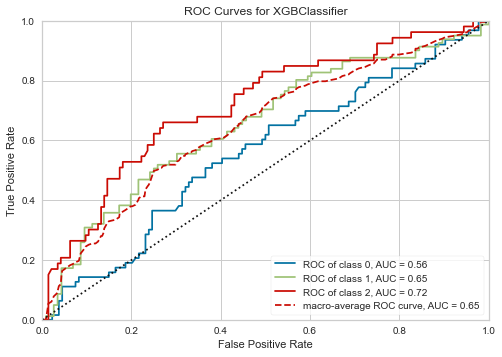

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [13]:
# Plotting ROC-AUC
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(
    classifier, per_class=True, cmap="cool", micro=False,
)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

# Scoring New Data

## Train Data

In [14]:
new_data = X_train[X_train.index == 28]

In [15]:
classifier.predict(new_data)

array([1], dtype=int64)

In [16]:
y_train[y_train.index == 28]

,knowledge_improvement
28,1


## Test Data

In [17]:
new_data = X_test[X_test.index == 1]

In [18]:
classifier.predict(new_data)

array([1], dtype=int64)

In [19]:
y_test[y_test.index == 1]

,knowledge_improvement
1,1
